In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as graph
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


sns.set_theme(style="whitegrid", context="notebook")

In [381]:
df = pd.read_csv("./apple_quality.csv")
df.drop(index=4000, inplace=True)  # Last row contains credits
df.drop("A_id", axis=1, inplace=True)
df.drop_duplicates(inplace=True)

df.loc[df['Quality'] == 'good', 'Quality'] = 1
df.loc[df['Quality'] == 'bad', 'Quality'] = 0
df['Quality'] = df['Quality'].astype(int)

<Axes: xlabel='Quality', ylabel='count'>

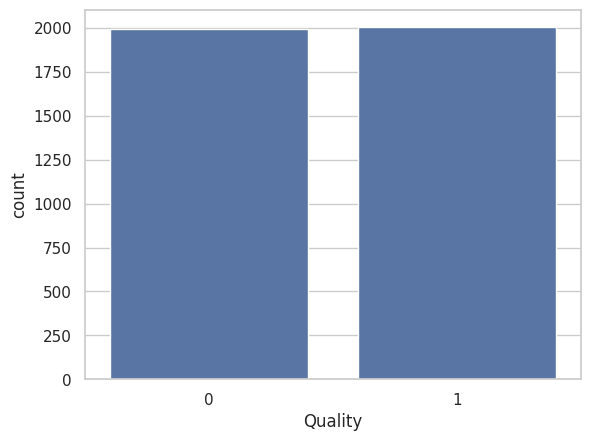

In [382]:
sns.countplot(data=df, x="Quality")

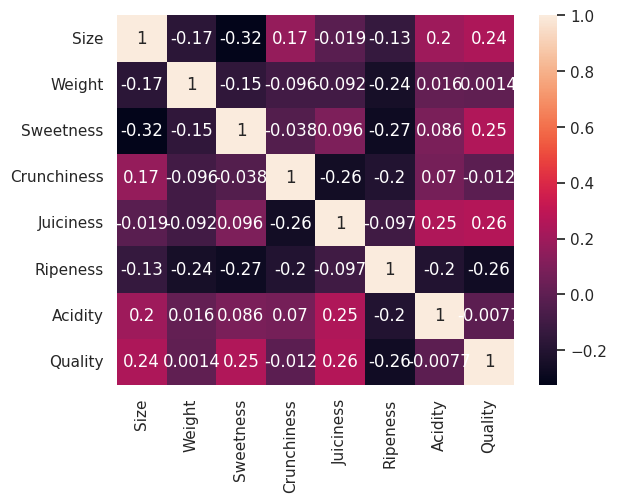

In [383]:
sns.heatmap(df.corr(), annot=True)
graph.show()

In [384]:
Y = df['Quality']
X = df.drop(['Quality'], axis=1)

In [385]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=4)

In [386]:
sc_x = StandardScaler()

x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [387]:
model = LogisticRegression(random_state=4, solver="saga")

model.fit(x_train,y_train)
predictions = model.predict(x_test)

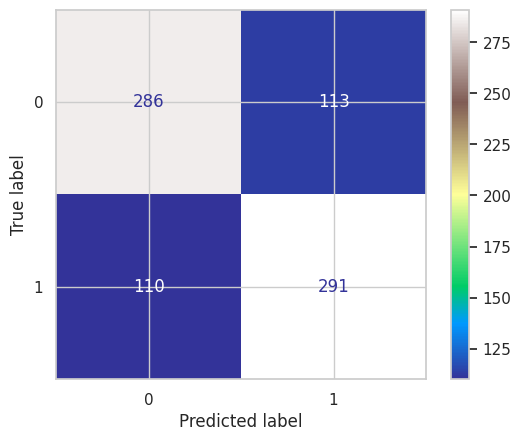

In [389]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="terrain")
graph.show()

In [391]:
print("Accuracy: ", model.score(x_test, y_test))

Accuracy:  0.72125
